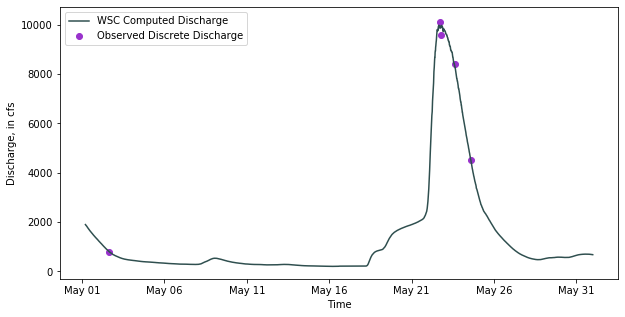

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from dynrat.timeseries import read_nwis_rdb, \
    RatedDischargeTimeSeries


aq_q_csv_path = 'data/02052090/site_02052090_iv_q_Aquarius.csv'
rated_q = RatedDischargeTimeSeries.from_aq_csv(aq_q_csv_path)

fm_rdb_path = 'data/02052090/site_02052090_fm_NWIS.txt'
observed_h, observed_q = read_nwis_rdb(fm_rdb_path)

fig, ax = plt.subplots(figsize=(10, 5))

_ = rated_q.plot(ax)
_ = observed_q.plot(ax)

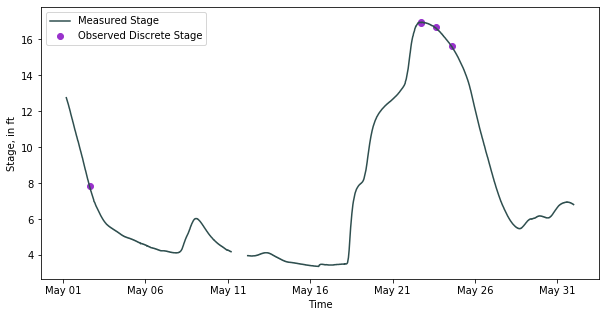

In [2]:
from dynrat.timeseries import MeasuredStageTimeSeries


aq_h_csv_path = 'data/02052090/site_02052090_iv_s_Aquarius.csv'
aq_stage_ts = MeasuredStageTimeSeries.from_aq_csv(aq_h_csv_path)

fig, ax = plt.subplots(figsize=(10, 5))

_ = aq_stage_ts.plot(ax)
_ = observed_h.plot(ax)

In [3]:
aq_stage_ts.null_obs()

105

In [4]:
from dynrat.timeseries import read_nwis_csv


nwis_csv_path = 'data/02052090/site_02052090_iv_q_s_NWIS.csv'

nwis_stage_ts, _ = read_nwis_csv(nwis_csv_path)

measured_h = aq_stage_ts.fill(nwis_stage_ts)
measured_h.null_obs()

0

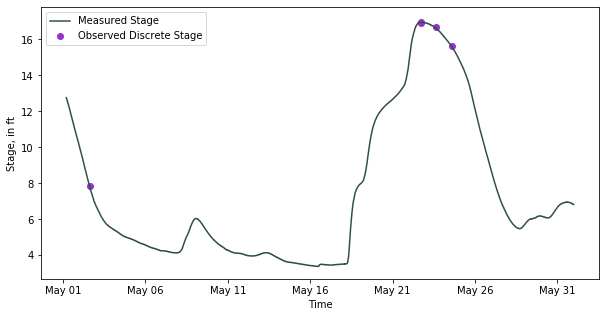

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = measured_h.plot(ax)
_ = observed_h.plot(ax)

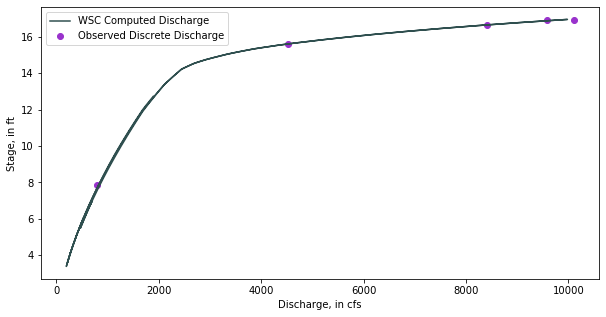

In [6]:
from dynrat.plot import stage_discharge_plot


fig, ax = plt.subplots(figsize=(10, 5))

_ = stage_discharge_plot(observed_h, observed_q, ax)
_ = stage_discharge_plot(measured_h, rated_q, ax)

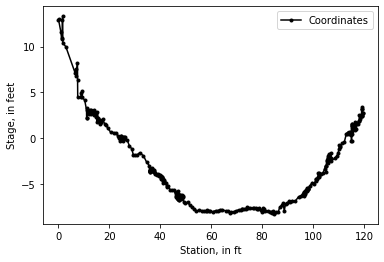

In [7]:
from dynrat.sect import CrossSect


xs_csv = 'data/02052090/site_02052090_cs_20180522.csv'

sect = CrossSect.from_csv(xs_csv)
_ = sect.plot()

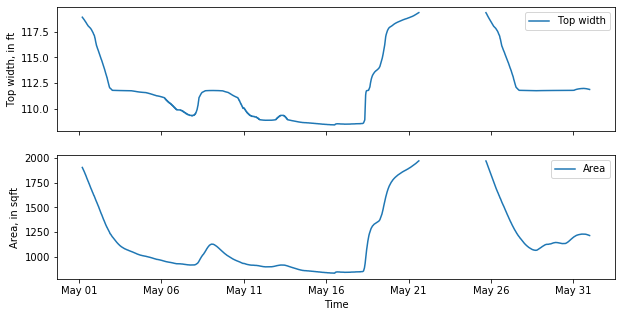

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

_ = measured_h.cross_section_plot(sect, 'top width', ax=ax1)
_ = ax1.set_ylabel('Top width, in ft')
_ = ax1.set_xlabel('')

_ = measured_h.cross_section_plot(sect, 'area', ax=ax2)
_ = ax2.set_ylabel('Area, in sqft')